# Introdução a classificação

In [183]:
# Features: [1 = sim; o = não]
# pelo longo
# perna curta
# faz auau

porco1 = [0,1,0]
porco2 = [0,1,1]
porco3 = [1,1,0]

cachorro1 = [0,1,1]
cachorro2 = [1,0,1]
cachorro3 = [1,1,1]

dados = [porco1, porco2, porco3, cachorro1, cachorro2, cachorro3] # o nome padrão de dados é x

# 1 = porco
# 0 = cachorro
classes = [1,1,1,0,0,0] # o nome padrao de classes é y

In [184]:
dados

[[0, 1, 0], [0, 1, 1], [1, 1, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]]

In [185]:
classes

[1, 1, 1, 0, 0, 0]

In [186]:
from sklearn.svm import LinearSVC

modelo = LinearSVC()
modelo.fit(dados, classes)

LinearSVC()

In [187]:
animal_misterioso = [0,1,1]
modelo.predict([animal_misterioso])

array([0])

In [188]:
animal_misterioso2 = [1,1,1]
modelo.predict([animal_misterioso2])

array([0])

In [189]:
animal_misterioso3 = [0,1,0]
modelo.predict([animal_misterioso3])

array([1])

In [190]:
animal_misterioso4 = [0,0,0]
modelo.predict([animal_misterioso4])

array([1])

In [191]:
misterio1 = [1,1,1]
misterio2 = [1,1,0]
misterio3 = [0,1,1]

teste = [misterio1, misterio2, misterio3]

previsoes = modelo.predict(teste)

In [192]:
testes_classes = [0,1,1]

In [193]:
previsoes

array([0, 1, 0])

In [194]:
previsoes == testes_classes

array([ True,  True, False])

In [195]:
(previsoes == testes_classes).sum()

2

In [196]:
corretos = (previsoes == testes_classes).sum()
total = len(teste)
taxa_de_acerto = corretos/total
print("Taxa de acerto: %.2f" % (taxa_de_acerto * 100))

Taxa de acerto: 66.67


In [197]:
from sklearn.metrics import accuracy_score

taxa_de_acerto = accuracy_score(testes_classes, previsoes)
print("Taxa de acerto: %.2f" % (taxa_de_acerto * 100))

Taxa de acerto: 66.67


**Refazendo com os nomes corretos das variáveis**

In [198]:
# Features: [1 = sim; o = não]
# pelo longo
# perna curta
# faz auau

porco1 = [0,1,0]
porco2 = [0,1,1]
porco3 = [1,1,0]

cachorro1 = [0,1,1]
cachorro2 = [1,0,1]
cachorro3 = [1,1,1]

teste_x = [porco1, porco2, porco3, cachorro1, cachorro2, cachorro3] # o nome padrão de dados é x

# 1 = porco
# 0 = cachorro
teste_y = [1,1,1,0,0,0] # o nome padrao de classes é y

In [199]:
teste_x

[[0, 1, 0], [0, 1, 1], [1, 1, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]]

In [200]:
teste_y

[1, 1, 1, 0, 0, 0]

In [201]:
from sklearn.svm import LinearSVC

modelo = LinearSVC()
modelo.fit(teste_x, teste_y)

LinearSVC()

In [202]:
misterio1 = [1,1,1]
misterio2 = [1,1,0]
misterio3 = [0,1,1]

teste = [misterio1, misterio2, misterio3]

previsoes = modelo.predict(teste)

In [203]:
testes_classes = [0,1,1]

In [204]:
previsoes

array([0, 1, 0])

In [205]:
previsoes == testes_classes

array([ True,  True, False])

In [206]:
from sklearn.metrics import accuracy_score

taxa_de_acerto = accuracy_score(testes_classes, previsoes)
print("Taxa de acerto: %.2f" % (taxa_de_acerto * 100))

Taxa de acerto: 66.67


# Testes replicáveis, estratificação e lendo dados da Internet

In [207]:
import pandas as pd

In [208]:
uri = "https://gist.githubusercontent.com/guilhermesilveira/b9dd8e4b62b9e22ebcb9c8e89c271de4/raw/c69ec4b708fba03c445397b6a361db4345c83d7a/tracking.csv"

In [209]:
dados = pd.read_csv(uri)

In [210]:
dados.head()

,inicial,palestras,contato,comprou,patrocinio
0,1,1,0,0,0
1,1,1,0,0,0
2,1,1,0,0,0
3,1,1,0,0,0
4,1,1,0,0,0


In [211]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   inicial     99 non-null     int64
 1   palestras   99 non-null     int64
 2   contato     99 non-null     int64
 3   comprou     99 non-null     int64
 4   patrocinio  99 non-null     int64
dtypes: int64(5)
memory usage: 4.0 KB


In [212]:
y = dados['comprou']
y.head()

,comprou
0,0
1,0
2,0
3,0
4,0


In [213]:
x = dados[['inicial', 'palestras', 'contato', 'patrocinio']]
x.head()

,inicial,palestras,contato,patrocinio
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0


In [214]:
dados.shape

(99, 5)

In [215]:
treino_x = x[:75]
treino_y = y[:75]

teste_x = x[75:]
teste_y = y[75:]

print(f"Treinaremos com {len(treino_x)} elementos")
print(f"Testaremos com {len(teste_x)} elementos")

Treinaremos com 75 elementos
Testaremos com 24 elementos


In [216]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

In [217]:
modelo = LinearSVC()
modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)

In [218]:
acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi de {acuracia:.2f}%")

A acurácia foi de 95.83%


# Usando a biblioteca para separar treino e teste

In [219]:
from sklearn.model_selection import train_test_split

In [220]:
train_test_split(x,y)

[    inicial  palestras  contato  patrocinio
 38        1          1        0           0
 44        0          0        1           0
 55        1          1        0           0
 26        1          1        1           0
 50        1          1        0           0
 ..      ...        ...      ...         ...
 45        0          0        1           0
 47        1          0        1           0
 15        0          0        1           0
 22        0          0        1           0
 73        0          0        1           0
 
 [74 rows x 4 columns],
     inicial  palestras  contato  patrocinio
 96        0          0        1           0
 1         1          1        0           0
 78        0          0        1           0
 62        0          0        1           0
 17        0          1        0           0
 43        1          0        1           0
 57        1          1        0           0
 60        1          0        1           0
 21        0          1      

In [221]:
SEED = 215445
treino_x, teste_x, treino_y, teste_y = train_test_split(x,y, random_state=SEED, stratify=y)
print(f"Treinaremos com {len(treino_x)} elementos")
print(f"Testaremos com {len(teste_x)} elementos")

Treinaremos com 74 elementos
Testaremos com 25 elementos


In [222]:
modelo = LinearSVC()
modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)

In [223]:
acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi de {acuracia:.2f}%")

A acurácia foi de 92.00%


In [224]:
treino_y.value_counts()

,count
comprou,
0,49
1,25


In [225]:
teste_y.value_counts()

,count
comprou,
0,17
1,8


# Um projeto de baixa dimensionalidade e o baseline

In [226]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/12291c548acaf544596795709020e3db/raw/325bdef098bd9cbc2189215b7e32e22f437f29f3/projetos.csv"

In [227]:
dados = pd.read_csv(uri)
dados.head()

,nao_finalizado,horas_esperadas,preco
0,0,75.0,6985.000000
1,1,0.0,4325.293458
2,0,87.0,14205.000000
3,1,13.0,100.000000
4,0,2.0,202.000000


In [228]:
# A função map() mapeia cada elemento de série de dados do Pandas, transformando os valores com base em uma regra específica.

dados["finalizado"] = dados["nao_finalizado"].map({1: 0, 0: 1})
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,0,75.0,6985.000000,1
1,1,0.0,4325.293458,0
2,0,87.0,14205.000000,1
3,1,13.0,100.000000,0
4,0,2.0,202.000000,1


In [229]:
import seaborn as sns

<Axes: xlabel='horas_esperadas', ylabel='preco'>

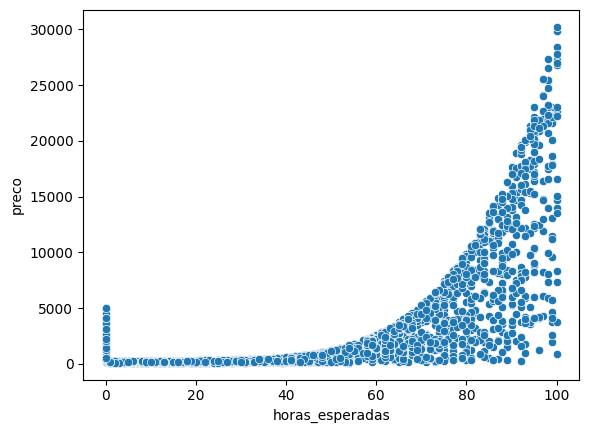

In [230]:
sns.scatterplot(x="horas_esperadas", y="preco", data=dados)

<Axes: xlabel='horas_esperadas', ylabel='preco'>

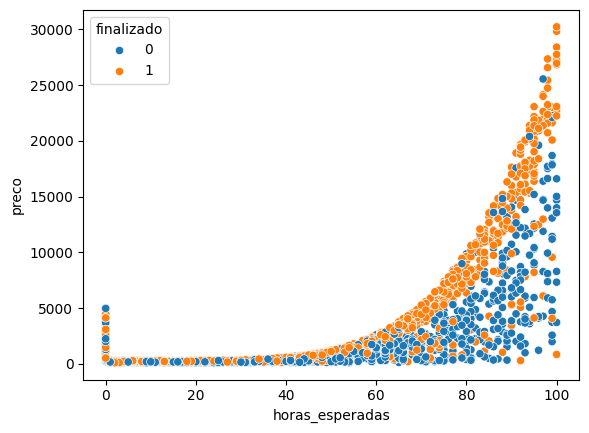

In [231]:
sns.scatterplot(x="horas_esperadas", y="preco", data=dados, hue="finalizado")

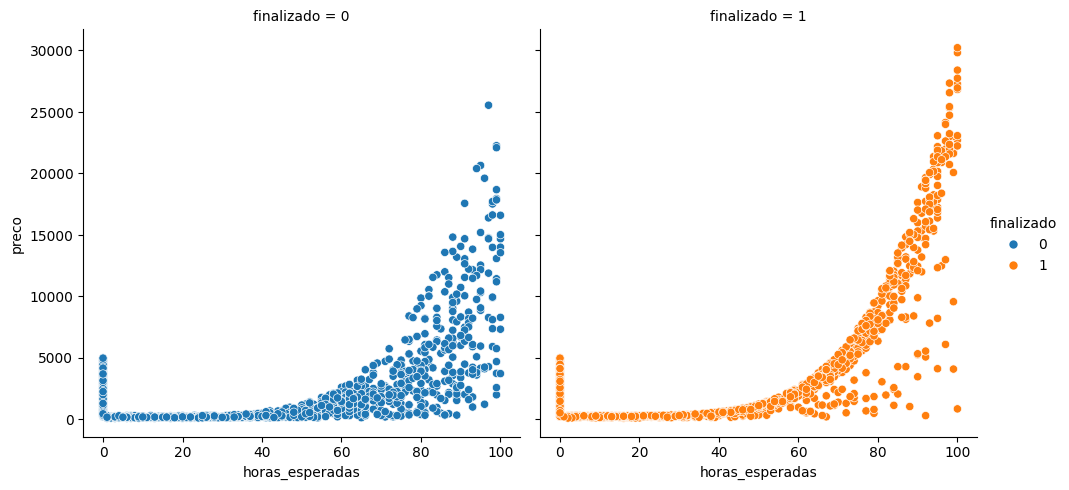

In [232]:
sns.relplot(x="horas_esperadas", y="preco", data=dados, hue="finalizado", col="finalizado")

In [233]:
# jogar fora as linhas com horas_esperadas = 0
dados = dados.query("horas_esperadas > 0")
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,0,75.0,6985.0,1
2,0,87.0,14205.0,1
3,1,13.0,100.0,0
4,0,2.0,202.0,1
5,0,49.0,1096.0,1


In [234]:
x = dados[["horas_esperadas", "preco"]]
y = dados["finalizado"]

In [235]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED,
                                                         stratify = y)
print(f"Treinaremos com {len(treino_x)}")
print(f"Testaremos com {len(teste_x)}")

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi de {acuracia:.2f}%")

Treinaremos com 1617
Testaremos com 540
A acurácia foi de 60.56%


In [236]:
teste_y.sum() / len(teste_y)

0.5259259259259259

In [237]:
previsoes_de_base = teste_y.sum() / len(teste_y) * 100
print(f"A acurácia do modelo de base foi de {previsoes_de_base:.2f}%")

A acurácia do modelo de base foi de 52.59%


In [238]:
x_min = teste_x["horas_esperadas"].min()
x_max = teste_x["horas_esperadas"].max()
y_min = teste_x["preco"].min()
y_max = teste_x["preco"].max()

print(f"x_min: {x_min}")
print(f"x_max: {x_max}")
print(f"y_min: {y_min}")
print(f"y_max: {y_max}")

x_min: 1.0
x_max: 100.0
y_min: 102.0
y_max: 30223.0


In [239]:
import numpy as np

pixels = 100

eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [240]:
eixo_x

array([ 1.  ,  1.99,  2.98,  3.97,  4.96,  5.95,  6.94,  7.93,  8.92,
        9.91, 10.9 , 11.89, 12.88, 13.87, 14.86, 15.85, 16.84, 17.83,
       18.82, 19.81, 20.8 , 21.79, 22.78, 23.77, 24.76, 25.75, 26.74,
       27.73, 28.72, 29.71, 30.7 , 31.69, 32.68, 33.67, 34.66, 35.65,
       36.64, 37.63, 38.62, 39.61, 40.6 , 41.59, 42.58, 43.57, 44.56,
       45.55, 46.54, 47.53, 48.52, 49.51, 50.5 , 51.49, 52.48, 53.47,
       54.46, 55.45, 56.44, 57.43, 58.42, 59.41, 60.4 , 61.39, 62.38,
       63.37, 64.36, 65.35, 66.34, 67.33, 68.32, 69.31, 70.3 , 71.29,
       72.28, 73.27, 74.26, 75.25, 76.24, 77.23, 78.22, 79.21, 80.2 ,
       81.19, 82.18, 83.17, 84.16, 85.15, 86.14, 87.13, 88.12, 89.11,
       90.1 , 91.09, 92.08, 93.07, 94.06, 95.05, 96.04, 97.03, 98.02,
       99.01])

In [241]:
eixo_y

array([  102.  ,   403.21,   704.42,  1005.63,  1306.84,  1608.05,
        1909.26,  2210.47,  2511.68,  2812.89,  3114.1 ,  3415.31,
        3716.52,  4017.73,  4318.94,  4620.15,  4921.36,  5222.57,
        5523.78,  5824.99,  6126.2 ,  6427.41,  6728.62,  7029.83,
        7331.04,  7632.25,  7933.46,  8234.67,  8535.88,  8837.09,
        9138.3 ,  9439.51,  9740.72, 10041.93, 10343.14, 10644.35,
       10945.56, 11246.77, 11547.98, 11849.19, 12150.4 , 12451.61,
       12752.82, 13054.03, 13355.24, 13656.45, 13957.66, 14258.87,
       14560.08, 14861.29, 15162.5 , 15463.71, 15764.92, 16066.13,
       16367.34, 16668.55, 16969.76, 17270.97, 17572.18, 17873.39,
       18174.6 , 18475.81, 18777.02, 19078.23, 19379.44, 19680.65,
       19981.86, 20283.07, 20584.28, 20885.49, 21186.7 , 21487.91,
       21789.12, 22090.33, 22391.54, 22692.75, 22993.96, 23295.17,
       23596.38, 23897.59, 24198.8 , 24500.01, 24801.22, 25102.43,
       25403.64, 25704.85, 26006.06, 26307.27, 26608.48, 26909

In [242]:
xx, yy = np.meshgrid(eixo_x, eixo_y)

In [243]:
xx

array([[ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       ...,
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01]])

In [244]:
yy

array([[  102.  ,   102.  ,   102.  , ...,   102.  ,   102.  ,   102.  ],
       [  403.21,   403.21,   403.21, ...,   403.21,   403.21,   403.21],
       [  704.42,   704.42,   704.42, ...,   704.42,   704.42,   704.42],
       ...,
       [29319.37, 29319.37, 29319.37, ..., 29319.37, 29319.37, 29319.37],
       [29620.58, 29620.58, 29620.58, ..., 29620.58, 29620.58, 29620.58],
       [29921.79, 29921.79, 29921.79, ..., 29921.79, 29921.79, 29921.79]])

In [245]:
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.020000e+02],
       [1.990000e+00, 1.020000e+02],
       [2.980000e+00, 1.020000e+02],
       ...,
       [9.703000e+01, 2.992179e+04],
       [9.802000e+01, 2.992179e+04],
       [9.901000e+01, 2.992179e+04]])

In [246]:
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
Z

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

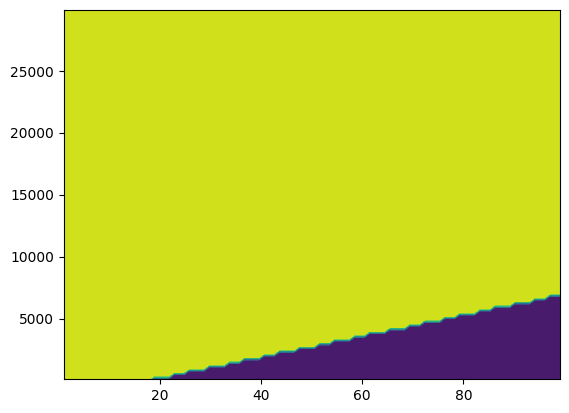

In [247]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z)

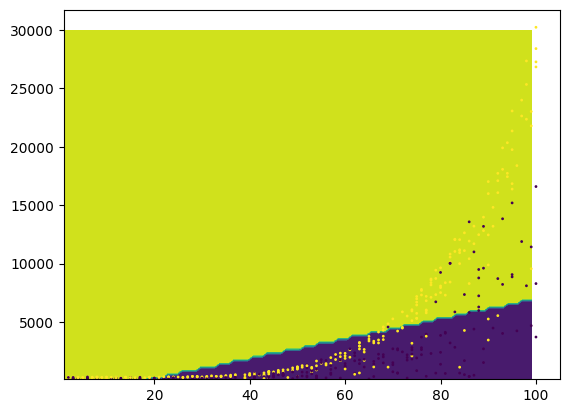

In [248]:
plt.contourf(xx, yy, Z)
plt.scatter(teste_x["horas_esperadas"], teste_x["preco"], c=teste_y, s=1)

# Support vector Machine e não linearidade

SVC

In [249]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED,
                                                         stratify = y)
print(f"Treinaremos com {len(treino_x)}")
print(f"Testaremos com {len(teste_x)}")

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi de {acuracia:.2f}%")

Treinaremos com 1617
Testaremos com 540
A acurácia foi de 56.67%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


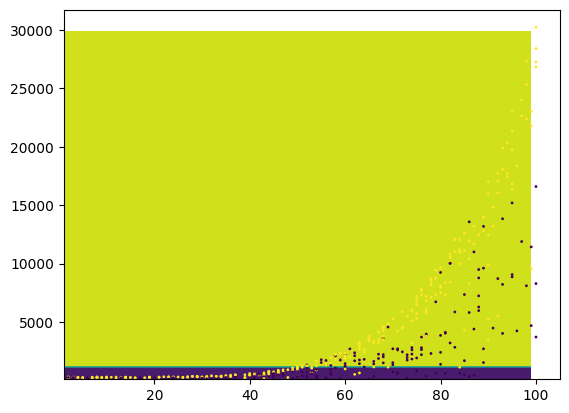

In [250]:
x_min = teste_x["horas_esperadas"].min()
x_max = teste_x["horas_esperadas"].max()
y_min = teste_x["preco"].min()
y_max = teste_x["preco"].max()

pixels = 100

eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z)
plt.scatter(teste_x["horas_esperadas"], teste_x["preco"], c=teste_y, s=1)

In [251]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED,
                                                         stratify = y)
print(f"Treinaremos com {len(treino_x)}")
print(f"Testaremos com {len(teste_x)}")

modelo = SVC(gamma='auto')
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi de {acuracia:.2f}%")

Treinaremos com 1617
Testaremos com 540
A acurácia foi de 57.78%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


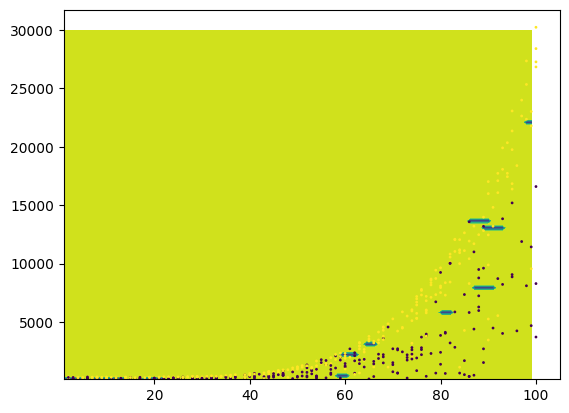

In [252]:
x_min = teste_x["horas_esperadas"].min()
x_max = teste_x["horas_esperadas"].max()
y_min = teste_x["preco"].min()
y_max = teste_x["preco"].max()

pixels = 100

eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z)
plt.scatter(teste_x["horas_esperadas"], teste_x["preco"], c=teste_y, s=1)

In [253]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

SEED = 20

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED,
                                                         stratify = y)
print(f"Treinaremos com {len(raw_treino_x)}")
print(f"Testaremos com {len(raw_teste_x)}")

scaler = StandardScaler()
scaler.fit(raw_treino_x)

treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC(gamma='auto')
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi de {acuracia:.2f}%")

Treinaremos com 1617
Testaremos com 540
A acurácia foi de 68.52%


In [254]:
teste_x

array([[ 1.21903398, -0.51627687],
       [ 0.868926  ,  0.53984011],
       [ 0.13369924, -0.4353314 ],
       ...,
       [ 1.74419595,  2.72476393],
       [ 0.23873164, -0.22249714],
       [-0.63653831, -0.53661392]])

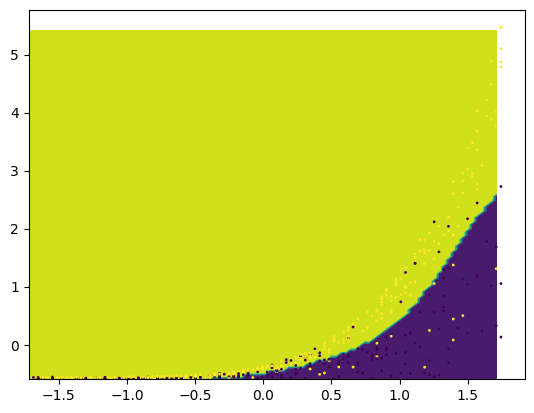

In [255]:
data_col1 = teste_x[:, 0]
data_col2 = teste_x[:, 1]

x_min = data_col1.min()
x_max = data_col1.max()
y_min = data_col2.min()
y_max = data_col2.max()

pixels = 100

eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z)
plt.scatter(data_col1, data_col2, c=teste_y, s=1)

**Para saber mais: pré-processando dados com StandardScaler()**

StandardScaler() é uma classe de pré-processamento de dados do scikit-learn. Essa classe ajuda a normalizar a escala dos dados, o que é crucial para muitos algoritmos de aprendizado de máquina que são sensíveis à variação nas escalas das características (features) dos dados.

Como a StandardScaler() funciona?
Quando você aplica a StandardScaler() a um conjunto de dados, ela realiza as seguintes etapas para cada característica:

Calcula a média de cada característica.
Calcula o desvio padrão de cada característica, medindo quão dispersos estão os valores em relação à média.
Normaliza os valores subtraindo a média e dividindo pelo desvio padrão para cada valor de característica, com a fórmula:

**z = (x - u) / s**

onde:

z é o valor padronizado da característica,
x é o valor original da característica,
u é a média da característica,
s é o desvio padrão da característica.
Este processo de normalização ajusta os dados de tal forma que a média das características transformadas é zero e o desvio padrão é um. Isso é importante porque muitos algoritmos de machine learning performam melhor quando as características estão na mesma escala.

Assim, a StandardScaler() ajuda a garantir que o modelo de aprendizado de máquina não seja indevidamente influenciado por variações na escala ou na distribuição dos dados de entrada.

# Dummy classifiers e a árvore de decisões

In [256]:
import pandas as pd

dados = pd.read_csv("https://gist.githubusercontent.com/guilhermesilveira/dd7ba8142321c2c8aaa0ddd6c8862fcc/raw/e694a9b43bae4d52b6c990a5654a193c3f870750/precos.csv")
dados.head()

,milhas_por_ano,ano_do_modelo,preco,vendido
0,21801,2000,30941.02,1
1,7843,1998,40557.96,1
2,7109,2006,89627.50,0
3,26823,2015,95276.14,0
4,7935,2014,117384.68,1


In [257]:
dados["km_por_ano"] = dados["milhas_por_ano"] * 1.60934
dados.head()

,milhas_por_ano,ano_do_modelo,preco,vendido,km_por_ano
0,21801,2000,30941.02,1,35085.22134
1,7843,1998,40557.96,1,12622.05362
2,7109,2006,89627.50,0,11440.79806
3,26823,2015,95276.14,0,43167.32682
4,7935,2014,117384.68,1,12770.11290


In [258]:
from datetime import datetime

dados["idade"] = datetime.today().year - dados["ano_do_modelo"]
dados.head()

,milhas_por_ano,ano_do_modelo,preco,vendido,km_por_ano,idade
0,21801,2000,30941.02,1,35085.22134,24
1,7843,1998,40557.96,1,12622.05362,26
2,7109,2006,89627.50,0,11440.79806,18
3,26823,2015,95276.14,0,43167.32682,9
4,7935,2014,117384.68,1,12770.11290,10


In [259]:
dados.drop(["milhas_por_ano", "ano_do_modelo"], axis=1, inplace=True)
dados.head()

,preco,vendido,km_por_ano,idade
0,30941.02,1,35085.22134,24
1,40557.96,1,12622.05362,26
2,89627.50,0,11440.79806,18
3,95276.14,0,43167.32682,9
4,117384.68,1,12770.11290,10


In [260]:
x = dados[["preco", "idade", "km_por_ano"]]
y = dados["vendido"]

In [261]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

SEED = 20

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED,
                                                         stratify = y)
print(f"Treinaremos com {len(raw_treino_x)}")
print(f"Testaremos com {len(raw_teste_x)}")


scaler = StandardScaler()
scaler.fit(raw_treino_x)

treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)


modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi de {acuracia:.2f}%")

Treinaremos com 7500
Testaremos com 2500
A acurácia foi de 69.92%


In [262]:
len(dados.query("vendido == True")) / len(dados)

0.58

In [263]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier

SEED = 20

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED,
                                                         stratify = y)
print(f"Treinaremos com {len(raw_treino_x)}")
print(f"Testaremos com {len(raw_teste_x)}")

classificador = DummyClassifier()
classificador.fit(raw_treino_x, treino_y)
previsoes = classificador.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia do dummy foi de {acuracia:.2f}%")

Treinaremos com 7500
Testaremos com 2500
A acurácia do dummy foi de 58.00%


In [264]:
classificador = DummyClassifier(strategy = 'stratified')

In [265]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier

SEED = 20

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED,
                                                         stratify = y)
print(f"Treinaremos com {len(raw_treino_x)}")
print(f"Testaremos com {len(raw_teste_x)}")

classificador = DummyClassifier(strategy='stratified')
classificador.fit(raw_treino_x, treino_y)
previsoes = classificador.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia do dummy foi de {acuracia:.2f}%")

Treinaremos com 7500
Testaremos com 2500
A acurácia do dummy foi de 51.12%


In [266]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED,
                                                         stratify = y)
print(f"Treinaremos com {len(treino_x)}")
print(f"Testaremos com {len(teste_x)}")

modelo = DecisionTreeClassifier()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi de {acuracia:.2f}%")

Treinaremos com 7500
Testaremos com 2500
A acurácia foi de 70.88%


In [267]:
from sklearn.tree import export_graphviz
export_graphviz(modelo)

'digraph Tree {\nnode [shape=box, fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="x[0] <= 59976.24\\ngini = 0.487\\nsamples = 7500\\nvalue = [3150, 4350]"] ;\n1 [label="x[0] <= 40083.385\\ngini = 0.198\\nsamples = 3261\\nvalue = [364, 2897]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="gini = 0.0\\nsamples = 1425\\nvalue = [0, 1425]"] ;\n1 -> 2 ;\n3 [label="x[2] <= 10288.51\\ngini = 0.318\\nsamples = 1836\\nvalue = [364, 1472]"] ;\n1 -> 3 ;\n4 [label="x[0] <= 48923.07\\ngini = 0.482\\nsamples = 42\\nvalue = [17, 25]"] ;\n3 -> 4 ;\n5 [label="x[1] <= 17.0\\ngini = 0.484\\nsamples = 17\\nvalue = [10, 7]"] ;\n4 -> 5 ;\n6 [label="x[0] <= 47429.395\\ngini = 0.32\\nsamples = 5\\nvalue = [1, 4]"] ;\n5 -> 6 ;\n7 [label="gini = 0.0\\nsamples = 4\\nvalue = [0, 4]"] ;\n6 -> 7 ;\n8 [label="gini = 0.0\\nsamples = 1\\nvalue = [1, 0]"] ;\n6 -> 8 ;\n9 [label="x[0] <= 43133.205\\ngini = 0.375\\nsamples = 12\\nvalue = [9, 3]"] ;\n5 -> 9 ;\n10 [label="gini

In [268]:
import graphviz

estrutura = export_graphviz(modelo)
grafico = graphviz.Source(estrutura)
grafico

In [269]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED,
                                                         stratify = y)
print(f"Treinaremos com {len(treino_x)}")
print(f"Testaremos com {len(teste_x)}")

modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi de {acuracia:.2f}%")

Treinaremos com 7500
Testaremos com 2500
A acurácia foi de 78.40%


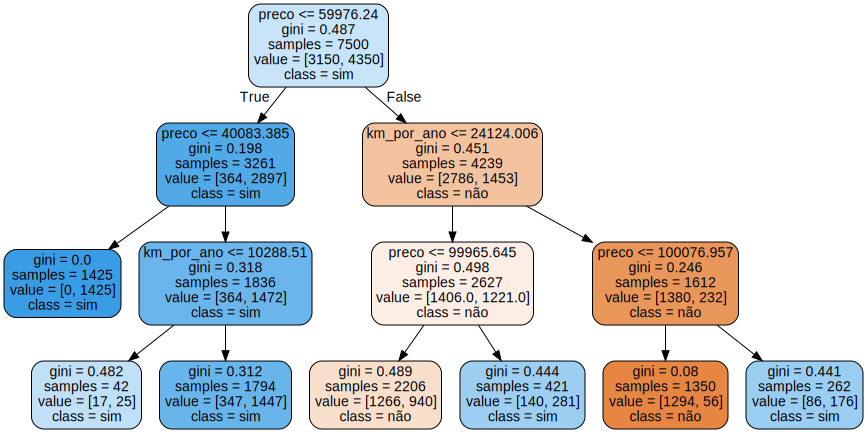

In [270]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(modelo)
estrutura = export_graphviz(modelo, filled=True, rounded=True, feature_names=x.columns, class_names=["não","sim" ])
grafico = graphviz.Source(estrutura)
grafico

In [271]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

SEED = 20

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED,
                                                         stratify = y)
print(f"Treinaremos com {len(raw_treino_x)}")
print(f"Testaremos com {len(raw_teste_x)}")

scaler = StandardScaler()
scaler.fit(raw_treino_x)

treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi de {acuracia:.2f}%")

Treinaremos com 7500
Testaremos com 2500
A acurácia foi de 78.40%


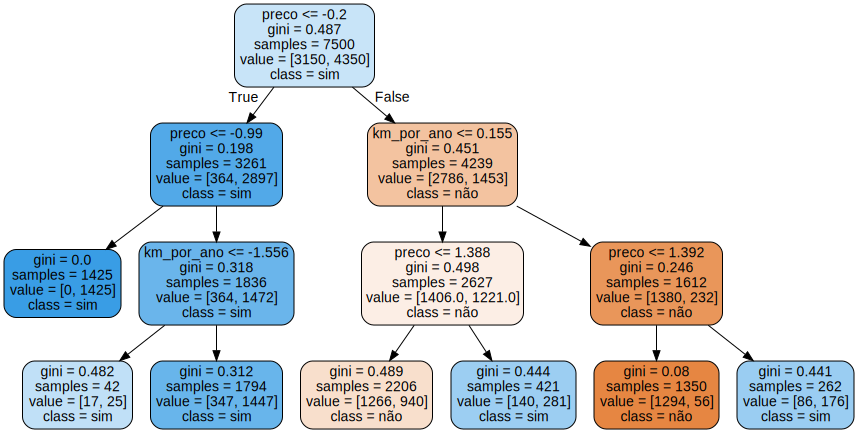

In [272]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(modelo)
estrutura = export_graphviz(modelo, filled=True, rounded=True, feature_names=x.columns, class_names=["não","sim" ])
grafico = graphviz.Source(estrutura)
grafico

**overfitting**

Imagine que você está trabalhando em um projeto de classificação para prever se um carro será vendido ou não, com base em suas características como marca, modelo, ano, quilometragem etc. Você desenvolve um modelo de machine learning que, após treinamento, demonstra uma incrível precisão de 95% no conjunto de dados de treinamento. Contudo, quando você testa o modelo em um novo conjunto de dados, a precisão despenca para apenas 55%. Isso indica que o modelo não está generalizando bem para novos dados. Este fenômeno é conhecido como overfitting (sobreajuste).

Causas do Overfitting
E o que pode causar o processo de overfitting? Podemos levantar as seguintes hipóteses:

Complexidade do modelo: Se você usar um modelo muito complexo para um conjunto de dados relativamente simples, é provável que o modelo aprenda até mesmo o ruído nos dados de treinamento, como detalhes específicos que não são relevantes para outros dados.

Dados de treinamento inadequados: Se o conjunto de treinamento for muito pequeno ou não representar adequadamente todos os tipos de carros, o modelo pode não aprender características generalizáveis sobre o que faz um carro ser vendido ou não.

Características irrelevantes: Imagine que você está tentando prever o preço de um carro com base em diferentes características, como o tipo de motor, quilometragem e ano de fabricação. Se você incluir a cor do carro na sua análise, mas a cor não tem impacto real no preço nesse mercado específico, o modelo pode acabar aprendendo relações incorretas relacionadas à cor, que não têm a ver com o preço real do carro. Portanto, é importante incluir apenas características que realmente influenciam o que você está tentando prever para garantir que o modelo aprenda padrões úteis e precisos.

Ao desenvolver um modelo é crucial ter em mente a necessidade de generalização. Overfitting é um risco real, mas com as técnicas adequadas, você pode construir um modelo que não apenas performa bem nos dados de treinamento, mas que também mantém uma boa performance em novos dados, garantindo sua utilidade e confiabilidade em situações reais.